In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import cv2
import numpy as np
#from dados_sys import *
from fun import *

# Work 1: ESTEGANOGRAFIA

MO443_1s2022

### Wladimir Arturo Garces Carrillo

#### RA204059

# Considerações iniciais

### * *Entradas*

#### São considerados para entrada:São considerados para entrada:

- Modo
- RGB plano.
- Arquivo de imagem.
- Arquivo de texto.

### * *Formato de entrada*

#### * *encrypter:*

<center>python run.py  *|modo|  |plano RGB|  |Nombre de la imagen|  |Nombre de archivo de texto entrada|*</center>

#### * *decrypter*

<center>python run.py  *|modo|  |canales RGB|  |Nombre de la imagen|  |Nombre de archivo de texto salida|*</center>

##### **Modo:** O modo refere-se à função que vai ser executada, para este caso teríamos 2: *"encrypter"* e *"decrypter"*

##### **Canais:** você pode escolher em quais canais a mensagem pode ser ocultada, caso queira apenas no canal Azul ("B"), Verde ("G") ou Vermelho ("R"). Você também pode escolher variações e combinações desses canais "BG", "BR", "GR", "BGR" ou "RGB".

##### **Arquivo de Imagem:** Refere-se ao nome do arquivo de imagem que será fornecido ao sistema como uma string. Deve-se considerar que o arquivo com este nome reside na pasta *imagem/* e que o nome contém a extensão do arquivo em *.png"*.

##### **Arquivo de texto de entrada:** Refere-se ao nome do arquivo de texto que será fornecido ao sistema como uma string de texto. Deve-se considerar que este nome deve conter a extensão onde o arquivo estará localizado ou estar localizado na pasta que contém o script principal. Da mesma forma que o arquivo de imagem, este nome deve conter a extensão do arquivo em *.txt"*

##### **Arquivo de texto de saída:** Refere-se ao nome do arquivo de texto que será retornado pelo sistema. Deve-se considerar que este nome deve conter a extensão onde o arquivo estará localizado, caso contrário ele ficará localizado na pasta de contenção do script principal. Da mesma forma que o arquivo de texto de entrada, este nome deve conter a extensão do arquivo em *.txt"*

### * Peso

O peso é um dos pontos a considerar, pois para algumas configurações não será possível ter mais de 1/8 do peso da imagem, sendo o máximo permitido 3/8 do peso da imagem. Pesos mais altos exigiriam o uso de mais de 3 bits menos significativos, de modo que pode ser entendido como uma perda muito óbvia da informação original do conteúdo da imagem.

Peso de archivo: 3562
Peso de la imagen: 110767


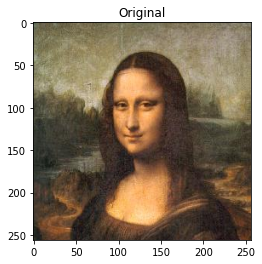

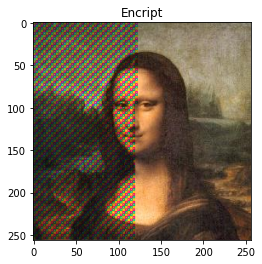

In [3]:
func["encrypter"]("monalisa.png", "teste_text.txt", func["RGB"], "plt")

No exemplo anterior pode-se ver que quando aumentamos o número de bits significativos, a imagem perde sua qualidade e modificações óbvias podem ser feitas na imagem.

##### * *Formato de saida*

##### * *encrypter*
O encrypter retornará a substituição do arquivo original.

<center>arquivo_imagem.png</center>

##### * *decrypter*
O decrypter retornará um arquivo no formato .txt e não modificará a imagem de entrada.O decodificador retornará um arquivo no formato .txt e não modificará a imagem de entrada.

<center>arquivo_texto.txt</center>

# Codificação

Para a codificação, são levados em consideração:

- **Plano de bits:**
Apenas o bit menos significativo do valor de cada pixel em cada canal será modificado, ou seja, cada pixel em seus três canais pode conter apenas 3 bits do arquivo a ser ocultado, porém esses bits não pertencem à mesma informação que discutido abaixo.

R\begin{equation}
    \begin{bmatrix}
        0011010&(1)
    \end{bmatrix}
\end{equation}
G\begin{equation}
    \begin{bmatrix}
        0010111&(0)
    \end{bmatrix}
\end{equation}
B\begin{equation}
    \begin{bmatrix}
        0010110&(1)
    \end{bmatrix}
\end{equation}

- **Estrutura:** cada Byte de informação do arquivo que você deseja ocultar, será salvo como um bloco bidimensional de 3x3 pixels. O pixel central (n,m) deste bloco servirá como referência de posição para localizar os bits do arquivo ao seu redor e que será calculado da seguinte forma:

R\begin{equation}
    \begin{bmatrix}
        (n-1,m-1)&(n-1,  m)&(n-1,m+1)\\
        (n  ,m-1)&(n  ,  m)&(n  ,m+1)\\
        (n+1,m+1)&(n+1,  m)&(n+1,m+1)
    \end{bmatrix}
\end{equation}

Essa estrutura permite que as informações sejam armazenadas "entre camadas" (em Profundidade) e não "por camadas" (Largura e altura).

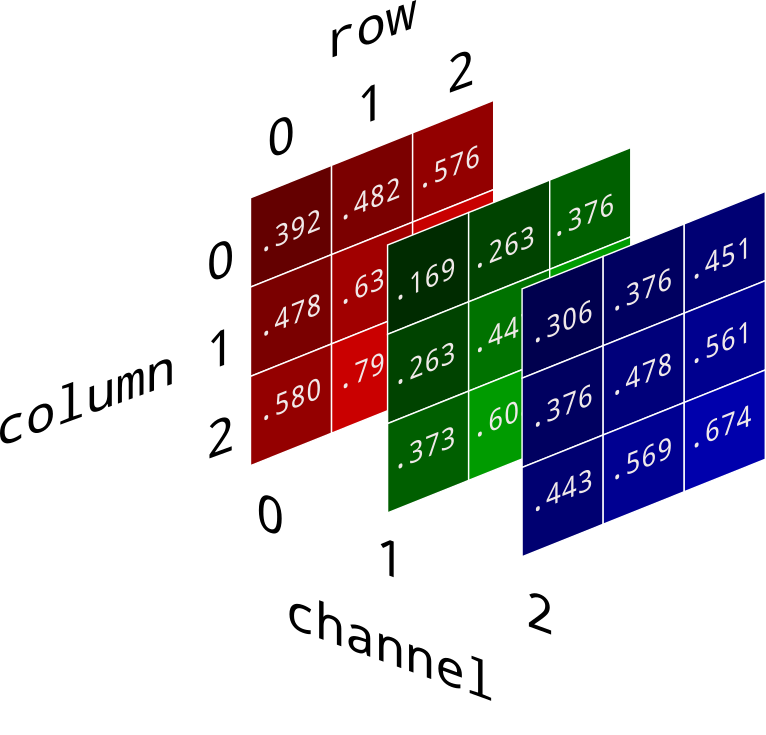

No formato de entrada você pode escolher qual dos canais deseja escolher conforme descrito nos itens anteriores.

# Uso

Os pacotes necessários para executar corretamente este arquivo são numpy e opencv, que são instalados com os seguintes comandos de um console.

<center>pip install numpy</center> 
<center>pip install opencv-python</center>

no terminal colocamos o ponteiro na pasta que contém o arquivo de execução *run.py* e compomos um comando de execução com o formato de criptografia:

<center>python run.py encrypter RGB monalisa.png o_que_se_odeia_no_indio.txt</center>

O comando pode ser interpretado em palavras como:

<center>"Run encrypter text *'o que se odeia no indio'* on monalisa png in planes RGB"

# Ejecução

**_Encrypter_**

Para la codificação se costruyo el siguiete proceso:

- Upload fornece uma imagem ou arquivo com o nome especificado na linha de comando:

In [18]:
# Upload da imagem e o arquivo
img = Imagem()
img.imag_up("monalisa.png")
file = File()
file.arq_up("o_que_se_odeia_no_indio.txt")

- Verifica se o peso do arquivo é menor que o peso da imagem:

In [ ]:
def com_weight(img, file)

- Binarização do arquivo e da imagem:

In [ ]:
def img_bin(img)
def arq_bin(file)

Essas duas funções geram os arquivos binários da nossa imagem e o arquivo de texto que queremos ocultar.

A primeira gera um arranjo matricial que representará o tamanho da nossa imagem, tanto em largura quanto em altura; Da mesma forma que a imagem original, esta matriz contém 3 canais que estão associados aos canais R, G e B. Na verdade, são matrizes que contêm os valores binários de cada pixel.

A segunda, análoga à primeira função, retorna uma lista contendo todos os caracteres binários do texto que você deseja ocultar.

- Proceso do encritação:

In [ ]:
def enc_proces(img, file, channels)

Esta função faz o processo de salvar a mensagem dentro da imagem.

Está dentro de um loop geral que será limitado pelos caracteres (em binário) contidos na lista de caracteres que geramos na parte de binarização.

In [ ]:
for l in binfile.data:
    l = list(l)
    #print (l)
    for i in r:
        for j in r:
            if n+i != n or m+j != m:
                binimg.array[n+i,m+j,ch[c]] = binimg.array[n+i,m+j,ch[c]][:-1]+l.pop(0)
                up = binimg.array[n+i,m+j,ch[c]]
    m += 3
    if m >= binimg.w - 2:
        m = 1
        n += 3
    if n >= binimg.h - 2: n = 1

    if c < len(ch)-1:
        c += 1
    else:
        c = 0

Dois loops aninhados que controlam a travessia do bloco bidimensional 3x3 que é observado em nossas descrições. As verificações nos permitirão nos mover pela altura e largura do canal em que nos encontramos.

- Recomposição de imagem

In [ ]:
def bin_img(binimg)

Observe que esta função é o oposto da função de binarização de imagem.

### Resultados 

- Encritacion imperseptible

Peso de archivo: 713
Peso de la imagen: 110767


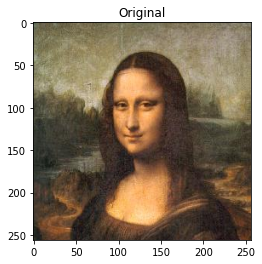

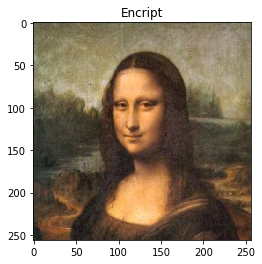

In [8]:
func["encrypter"](
                  "monalisa.png",
                  "o_que_se_odeia_no_indio.txt",
                  func["RGB"],
                  "plt")

- Encriptacion perceptible

Peso de archivo: 713
Peso de la imagen: 110767


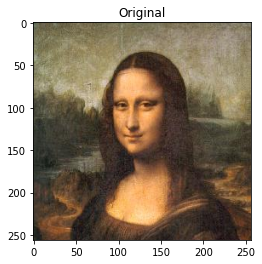

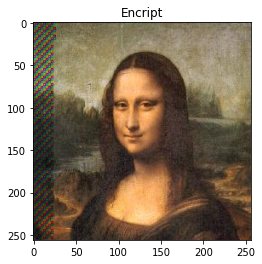

In [9]:
func["encrypter"](
                  "monalisa.png",
                  "o_que_se_odeia_no_indio.txt",
                  func["RGB"],
                  "plt")

**_Decrypter_**

Para decrypter o seguinte processo foi construído:

- Uploap da imagem com o nome espacifecado na linea de comandos:

In [ ]:
img = Imagem()
img.imag_up(nimg)

- processo de decomposição

In [ ]:
def dec_proces(img, ch)

Esta função faz o processo inverso de composição.

Ele entra em um loop que terminará quando encontrar o caractere final do texto, esse caractere será padronizado dentro da construção do nosso processo.

In [ ]:
while l != "%":
    l = []
    if m >= img.w - 2:
        m = 1
        n += 3
    if n >= img.h - 2: n = 1
    for i in r:
        for j in r:
            if n+i != n or m+j != m:
                l.append(img.array[n+i,m+j,ch[c]][-1:])
    l = chr(int("".join(l), 2))
    file.append(l)
    m += 3
    if c < len(ch)-1:
        c += 1
    else:
        c = 0

return file

Esse algoritmo irá percorrer a imagem de acordo com os canais que usamos para criptografia. Os "for" aninhados se encarregam de percorrer a estrutura de acordo com o bloco bidimensional 3x3 que estabelecemos nas considerações iniciais. Ao final retornará uma lista que conterá todos os caracteres da mensagem.

- Guardado del mensaje

In [ ]:
with open(nfile, "w") as f:
    f.write("".join(file))
    f.close()
print("".join(file))

Ao final, é criado o arquivo de destino no qual a mensagem será salva, todo o texto é compactado e a mensagem é salva, então imprimimos.

### Resultados

In [ ]:
func["decrypter"]("_monalisa.png", "mensagem.txt", func["RGB"])

Poema 'O que se odeia no Índio'
Reynaldo Jardim
O que se odeia no índio
não é apenas o ocupado espaço.
O que se odeia no índio
é o puro animal que nele habita,
é a sua cor em bronze arquitetada.
A precisão com que a flecha voa
e abate a caça; o gesto largo
com que abraça o rio; o gosto de
afagar as penas e tecer o cocar;
O que se odeia no índio
é o andar sem ruído; a presteza
segura de cada movimento; a eugenia
nítida do corpo erguido
contra a luz do sol.
O que se odeia no índio é o sol.
A árvore se odeia no índio.
O rio se odeia no índio.
O corpo a corpo com a vida
se odeia no índio.
O que se odeia no índio
é a permanência da infância.
E a liberdade aberta
se odeia no índio.

%


# Limitaçoes

- Para fazer *decrypter*, devem ser passados os mesmos parâmetros que em *encrypter*, no caso específico dos canais RGB. Portanto, se a mensagem foi salva nos planos "RG", esse mesmo parâmetro deve ser passado para *decrypter*.

- Conhecendo os planos em que a mensagem foi criptografada, pode ser mais fácil reconhecer o padrão em que a mensagem está armazenada.

- O acesso a planos de bits mais significativos também é limitado devido à perceptibilidade da mensagem dentro da imagem.